In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [ ]:
data = pd.read_excel("/content/2023 PDCLP injury details.xlsx")

In [ ]:
len(data.columns)

26

In [ ]:
data.drop( 167, inplace = True)
data.to_csv("Injury Analysis.csv", index = False)
data.describe()

,Incident Number,PD Experience Years,PD Experience Months,Incident Count,Injured Count
count,167.000000,167.000000,167.000000,167.0,167.0
mean,11493.419162,2.353293,3.203593,1.0,1.0
std,307.535840,4.873184,3.394785,0.0,0.0
min,10966.000000,0.000000,0.000000,1.0,1.0
25%,11221.500000,0.000000,0.000000,1.0,1.0
50%,11469.000000,0.000000,2.000000,1.0,1.0
75%,11746.000000,2.000000,6.000000,1.0,1.0
max,12061.000000,39.000000,15.000000,1.0,1.0


In [ ]:
data.head()

,Company Name,Rig/Camp/Unit,Incident Number,Event Date,Incident Calmonth,Customer,Injured Person Full Name,Position,Actual Risk,Potential Risk,...,PD Experience Years,PD Experience Months,Location,Operation,Derrick Hand,Driller,Floor Hand,Motor Hand,Incident Count,Injured Count
0,Precision Drilling Co. LP,Rig 049,11055.0,01/15/2023,JAN 2023,Veracity Energy LLC,Michael Mahoney,Floorhand,Low,Low,...,2.0,0.0,Lease General,Rig Up/Down,"Anthony Garza,Noe Gonzalez","Kevin Davis,Michael Abbott","Jose Delgado,Kenneth Harrington,Lawrence Hurks...","Javier Gomez,Ulises Olvera",1,1
1,Precision Drilling Co. LP,Rig 049,11075.0,01/19/2023,JAN 2023,#,Ulises Olvera,Motorhand,Low,Medium,...,12.0,0.0,Lease General,Rig Up/Down,#,#,#,#,1,1
2,Precision Drilling Co. LP,Rig 049,11215.0,02/15/2023,FEB 2023,Veracity Energy LLC,Jose Delgado,Floorhand,Low,Medium,...,10.0,0.0,Rig Floor,Wirelining,Anthony Garza,Kevin Davis,"Jose Delgado,Kenneth Harrington,Salvador Herna...",Ulises Olvera,1,1
3,Precision Drilling Co. LP,Rig 049,11933.0,08/17/2023,AUG 2023,#,Adam Kitchens,Derrickhand,Low,Low,...,2.0,0.0,Mud Tank/Rig Tank,Grinding/Buffing,#,#,#,#,1,1
4,Precision Drilling Co. LP,Rig 050,11352.0,03/14/2023,MAR 2023,"SWEPI, L.P.",David Aaron,Derrickhand,Low,Low,...,3.0,6.0,Mixing Area,Circulating/Kill Wel,David Aaron,Mervin Smith,"Daniel White,Noah Lafleur,Ryan Gardner",John Gargis,1,1


In [ ]:
data.columns

Index(['Company Name', 'Rig/Camp/Unit', 'Incident Number', 'Event Date',
       'Incident Calmonth', 'Customer', 'Injured Person Full Name', 'Position',
       'Actual Risk', 'Potential Risk', 'Target Type', 'Contact Type',
       'Body Part', 'Main Injury', 'Incident Class', 'Incident Description',
       'PD Experience Years', 'PD Experience Months', 'Location', 'Operation',
       'Derrick Hand', 'Driller', 'Floor Hand', 'Motor Hand', 'Incident Count',
       'Injured Count'],
      dtype='object')

# Understanding Data

In [ ]:
data[['Body Part', 'Main Injury', 'Incident Class', 'Incident Description','Incident Count',
       'Injured Count']].head()

,Body Part,Main Injury,Incident Class,Incident Description,Incident Count,Injured Count
0,Ankles,Strain/Sprain,FA,FH stated he rolled his right ankle on boarded...,1,1
1,Face,Cut/Laceration,FA,Wile removing 45 degree swedge from suspended ...,1,1
2,Back,Bruise/Contusion,FA,"After rigging up wireline, driller came up on ...",1,1
3,Feet,Foreign Body,FAD,WHILE USING A WIRE CUP BUFFER/GRINDER A STRAND...,1,1
4,Knees,Strain/Sprain,FAD,Employee was on the mud tanks and went downsta...,1,1


In [ ]:
data['Main Injury'].unique()

array(['Strain/Sprain', 'Cut/Laceration', 'Bruise/Contusion',
       'Foreign Body', 'Abrasion', 'Other', 'Burn/Scald', 'Fracture',
       'Chemical Exposure', 'Dislocation', 'Endocrine, nutrition',
       'Insect/Animal Bite', 'Dermatitis and eczem', 'Repetitive Strain',
       'Infections of the sk', 'Other disorders of t', 'Heat Exhaustion',
       'Diseases of the skin'], dtype=object)

# Date

In [ ]:
df = pd.DataFrame()

In [ ]:
data['Event Date'] = pd.to_datetime(data['Event Date'])
df["Month"] = data['Event Date'].dt.month
# df["Year"] = data['Event Date'].dt.year
df['Day'] = data['Event Date'].dt.day
df.head()

,Month,Day
0,1,15
1,1,19
2,2,15
3,8,17
4,3,14


# Encoding

## Main Injury : Label Encoding

In [ ]:
le = LabelEncoder()
le.fit(data['Main Injury'])

LabelEncoder()

In [ ]:
df["Main Injury"] = le.transform(data['Main Injury'])
df.head()

,Month,Day,Main Injury
0,1,15,17
1,1,19,4
2,2,15,1
3,8,17,9
4,3,14,17


In [ ]:
df["Injured Count"] = data['Injured Count']

## Correlation: Dates - Main Injury

In [ ]:
df['Month'].corr(df["Main Injury"])

-0.05954812503516732

In [ ]:
df['Day'].corr(df["Main Injury"])

-0.04580642434601247

## Correlation : Date - Injury Count

In [ ]:
df.head()

,Month,Day,Main Injury,Injured Count
0,1,15,17,1
1,1,19,4,1
2,2,15,1,1
3,8,17,9,1
4,3,14,17,1


### Month wise

In [ ]:
df[["Month", "Injured Count"]]

,Month,Injured Count
0,1,1
1,1,1
2,2,1
3,8,1
4,3,1
...,...,...
162,5,1
163,8,1
164,8,1
165,9,1


In [ ]:
injuries_by_month = df.groupby("Month")["Injured Count"].count()

In [ ]:
df_injury = pd.DataFrame(injuries_by_month).reset_index()
df_injury.head()

,Month,Injured Count
0,1,24
1,2,24
2,3,25
3,4,19
4,5,16


In [ ]:
df_injury['Month'].corr(df_injury['Injured Count'])

-0.8786485127056889

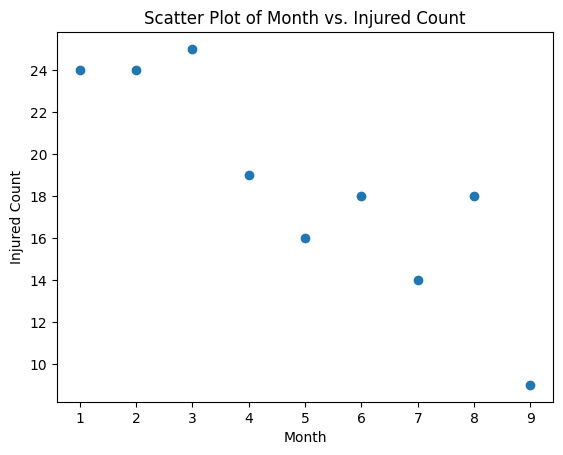

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_injury is your DataFrame
plt.scatter(df_injury['Month'], df_injury['Injured Count'])
plt.xlabel('Month')
plt.ylabel('Injured Count')
plt.title('Scatter Plot of Month vs. Injured Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


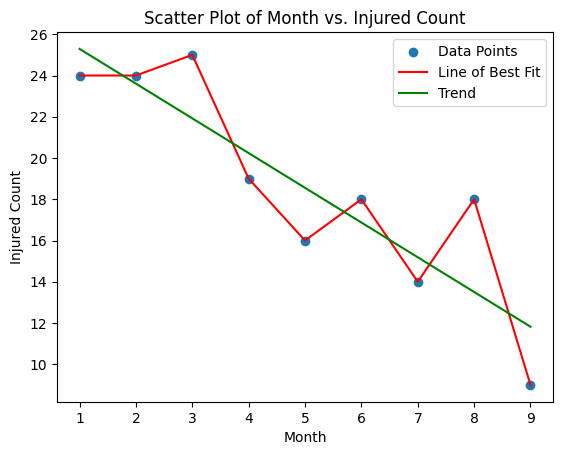

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_injury is your DataFrame
plt.scatter(df_injury['Month'], df_injury['Injured Count'], label='Data Points')
plt.xlabel('Month')
plt.ylabel('Injured Count')
plt.title('Scatter Plot of Month vs. Injured Count')

# Add a line of best fit
coefficients = np.polyfit(df_injury['Month'], df_injury['Injured Count'], 10)
line = np.polyval(coefficients, df_injury['Month'])
plt.plot(df_injury['Month'], line, color='red', label='Line of Best Fit')

coefficients = np.polyfit(df_injury['Month'], df_injury['Injured Count'], 1)
line = np.polyval(coefficients, df_injury['Month'])
plt.plot(df_injury['Month'], line, color='green', label='Trend')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Days

In [ ]:
df[["Day", "Injured Count"]]

,Day,Injured Count
0,15,1
1,19,1
2,15,1
3,17,1
4,14,1
...,...,...
162,9,1
163,17,1
164,25,1
165,9,1


In [ ]:
injury_day = df.groupby("Day")['Injured Count'].count()
df_day_injury = pd.DataFrame(injury_day).reset_index()
df_day_injury

,Day,Injured Count
0,1,2
1,2,6
2,3,3
3,4,5
4,5,9
5,6,11
6,7,5
7,8,8
8,9,8
9,10,4


In [ ]:
df_day_injury['Day'].corr(df_day_injury['Injured Count'])

-0.18596748633203034

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


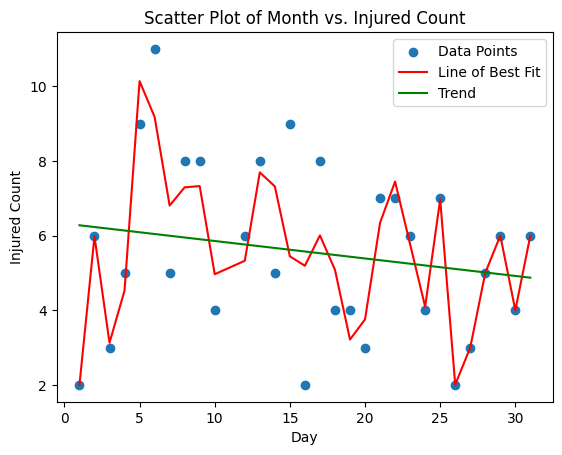

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_injury is your DataFrame
plt.scatter(df_day_injury['Day'], df_day_injury['Injured Count'], label='Data Points')
plt.xlabel('Day')
plt.ylabel('Injured Count')
plt.title('Scatter Plot of Month vs. Injured Count')

# Add a line of best fit
coefficients = np.polyfit(df_day_injury['Day'], df_day_injury['Injured Count'], 50)
line = np.polyval(coefficients, df_day_injury['Day'])
plt.plot(df_day_injury['Day'], line, color='red', label='Line of Best Fit')

coefficients = np.polyfit(df_day_injury['Day'], df_day_injury['Injured Count'], 1)
line = np.polyval(coefficients, df_day_injury['Day'])
plt.plot(df_day_injury['Day'], line, color='green', label='Trend')

# Display the legend
plt.legend()

# Show the plot
plt.show()


## Rigs with Injury.

In [ ]:
data.columns

Index(['Company Name', 'Rig/Camp/Unit', 'Incident Number', 'Event Date',
       'Incident Calmonth', 'Customer', 'Injured Person Full Name', 'Position',
       'Actual Risk', 'Potential Risk', 'Target Type', 'Contact Type',
       'Body Part', 'Main Injury', 'Incident Class', 'Incident Description',
       'PD Experience Years', 'PD Experience Months', 'Location', 'Operation',
       'Derrick Hand', 'Driller', 'Floor Hand', 'Motor Hand', 'Incident Count',
       'Injured Count'],
      dtype='object')

In [ ]:
rigs = data.groupby("Rig/Camp/Unit")['Injured Count'].count()
df_rigs = pd.DataFrame(rigs).reset_index()
print(df_rigs)

               Rig/Camp/Unit  Injured Count
0                    Rig 049              4
1                    Rig 050              1
2                    Rig 101              2
3                    Rig 109              1
4                    Rig 110              1
5                    Rig 461              5
6                    Rig 464              2
7                    Rig 515              2
8                    Rig 522              6
9                    Rig 523              1
10                   Rig 537              5
11                   Rig 539              3
12                   Rig 549              5
13                   Rig 550              1
14                   Rig 551              1
15                   Rig 553              3
16                   Rig 554              2
17                   Rig 556              2
18                   Rig 559              6
19                   Rig 560              2
20                   Rig 561              7
21                   Rig 564    

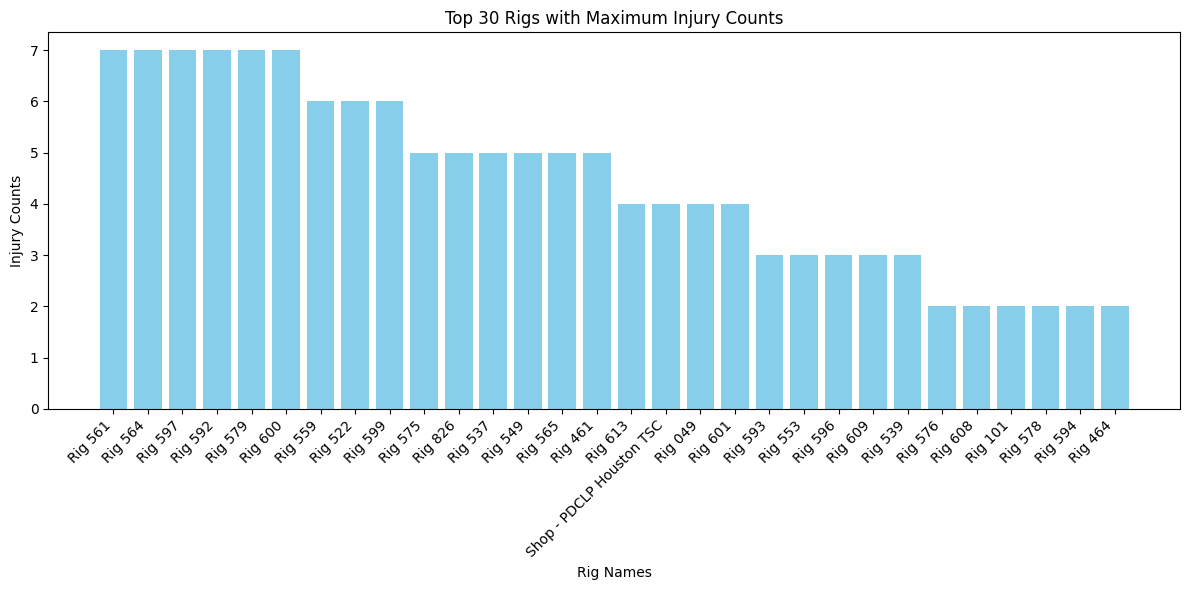

In [ ]:
top_10_rigs = df_rigs.sort_values(by='Injured Count', ascending=False).head(30)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_10_rigs['Rig/Camp/Unit'], top_10_rigs['Injured Count'], color='skyblue')
plt.xlabel('Rig Names')
plt.ylabel('Injury Counts')
plt.title('Top 30 Rigs with Maximum Injury Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Injuries and body part

In [ ]:
data.columns

Index(['Company Name', 'Rig/Camp/Unit', 'Incident Number', 'Event Date',
       'Incident Calmonth', 'Customer', 'Injured Person Full Name', 'Position',
       'Actual Risk', 'Potential Risk', 'Target Type', 'Contact Type',
       'Body Part', 'Main Injury', 'Incident Class', 'Incident Description',
       'PD Experience Years', 'PD Experience Months', 'Location', 'Operation',
       'Derrick Hand', 'Driller', 'Floor Hand', 'Motor Hand', 'Incident Count',
       'Injured Count'],
      dtype='object')

In [ ]:
data.head()

,Company Name,Rig/Camp/Unit,Incident Number,Event Date,Incident Calmonth,Customer,Injured Person Full Name,Position,Actual Risk,Potential Risk,...,PD Experience Years,PD Experience Months,Location,Operation,Derrick Hand,Driller,Floor Hand,Motor Hand,Incident Count,Injured Count
0,Precision Drilling Co. LP,Rig 049,11055.0,2023-01-15,JAN 2023,Veracity Energy LLC,Michael Mahoney,Floorhand,Low,Low,...,2.0,0.0,Lease General,Rig Up/Down,"Anthony Garza,Noe Gonzalez","Kevin Davis,Michael Abbott","Jose Delgado,Kenneth Harrington,Lawrence Hurks...","Javier Gomez,Ulises Olvera",1,1
1,Precision Drilling Co. LP,Rig 049,11075.0,2023-01-19,JAN 2023,#,Ulises Olvera,Motorhand,Low,Medium,...,12.0,0.0,Lease General,Rig Up/Down,#,#,#,#,1,1
2,Precision Drilling Co. LP,Rig 049,11215.0,2023-02-15,FEB 2023,Veracity Energy LLC,Jose Delgado,Floorhand,Low,Medium,...,10.0,0.0,Rig Floor,Wirelining,Anthony Garza,Kevin Davis,"Jose Delgado,Kenneth Harrington,Salvador Herna...",Ulises Olvera,1,1
3,Precision Drilling Co. LP,Rig 049,11933.0,2023-08-17,AUG 2023,#,Adam Kitchens,Derrickhand,Low,Low,...,2.0,0.0,Mud Tank/Rig Tank,Grinding/Buffing,#,#,#,#,1,1
4,Precision Drilling Co. LP,Rig 050,11352.0,2023-03-14,MAR 2023,"SWEPI, L.P.",David Aaron,Derrickhand,Low,Low,...,3.0,6.0,Mixing Area,Circulating/Kill Wel,David Aaron,Mervin Smith,"Daniel White,Noah Lafleur,Ryan Gardner",John Gargis,1,1


In [ ]:
data["Main Injury"].nunique()

18

In [ ]:
Injury = data.groupby("Main Injury")['Injured Count'].count()
df_injury = pd.DataFrame(Injury).reset_index()
df_injury.head()

,Main Injury,Injured Count
0,Abrasion,9
1,Bruise/Contusion,39
2,Burn/Scald,2
3,Chemical Exposure,4
4,Cut/Laceration,27


In [ ]:
d = data.groupby("Rig/Camp/Unit")['Main Injury'].count()
df_ = pd.DataFrame(d).reset_index()

In [ ]:
df_.head()

,Rig/Camp/Unit,Main Injury
0,Rig 049,4
1,Rig 050,1
2,Rig 101,2
3,Rig 109,1
4,Rig 110,1


## Position : Label Encoding

In [ ]:
data["Position"].nunique()
le = LabelEncoder()
le.fit(data["Position"])
df["Position"] = le.transform(data['Position'])
df.head()

,Month,Day,Main Injury,Injured Count,Position
0,1,15,17,1,6
1,1,19,4,1,7
2,2,15,1,1,6
3,8,17,9,1,2
4,3,14,17,1,2


## Actual Risk and Potential Risk : Ordinal Encoding

In [ ]:
# Define the mapping of categories to numerical values
ordinal_mapping = {"Low": 1, "Medium": 2, "High": 3}

# Apply ordinal encoding to the 'Actual Risk' column
df["Actual Risk"] = data["Actual Risk"].map(ordinal_mapping)
df["Potential Risk"] = data["Potential Risk"].map(ordinal_mapping)
df.head()

,Month,Day,Main Injury,Injured Count,Position,Actual Risk,Potential Risk
0,1,15,17,1,6,1,1.0
1,1,19,4,1,7,1,2.0
2,2,15,1,1,6,1,2.0
3,8,17,9,1,2,1,1.0
4,3,14,17,1,2,1,1.0


## Target Type

In [ ]:
data["Target Type"].nunique()

29

In [ ]:
data["Contact Type"].nunique()

10

In [ ]:
data["Body Part"].nunique()

20

In [ ]:
data["Main Injury"].nunique()

18

In [ ]:
data["Incident Class"].nunique()

6

In [ ]:
data['Location'].nunique()

27

In [ ]:
data["Operation"].nunique()

27

# Injury

In [ ]:
df["Injured Count"] = data["Injured Count"]
df["Incident Count"] = data["Incident Count"]

In [ ]:
df.corr()

,Month,Rig,Position,Actual Risk,Potential Risk,Injured Count,PD Exp,PD Month,Incident Count,Day
Month,1.000000,0.049655,0.030718,-0.016657,-0.126675,NaN,0.176333,0.070656,NaN,-0.016126
Rig,0.049655,1.000000,0.051140,0.043834,-0.024412,0.139912,0.074290,0.047239,0.139912,-0.055395
Position,0.030718,0.051140,1.000000,-0.028183,0.008697,0.225310,-0.051893,0.143131,0.225310,-0.041831
Actual Risk,-0.016657,0.043834,-0.028183,1.000000,0.615821,NaN,0.076501,-0.145538,NaN,0.132263
Potential Risk,-0.126675,-0.024412,0.008697,0.615821,1.000000,NaN,0.027759,-0.170992,NaN,0.094998
Injured Count,NaN,0.139912,0.225310,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN
PD Exp,0.176333,0.074290,-0.051893,0.076501,0.027759,NaN,1.000000,-0.369241,NaN,-0.016836
PD Month,0.070656,0.047239,0.143131,-0.145538,-0.170992,NaN,-0.369241,1.000000,NaN,-0.113131
Incident Count,NaN,0.139912,0.225310,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN
Day,-0.016126,-0.055395,-0.041831,0.132263,0.094998,NaN,-0.016836,-0.113131,NaN,1.000000


In [ ]:
df["PD Exp"] = data["PD Experience Years"]
df['PD Month'] = data['PD Experience Months']
df.head()

,Month,Rig,Position,Actual Risk,Potential Risk,Injured Count,PD Exp,PD Month
0,1.0,0,6,1.0,1.0,1,2.0,0.0
1,1.0,0,7,1.0,2.0,1,12.0,0.0
2,2.0,0,6,1.0,2.0,1,10.0,0.0
3,8.0,0,2,1.0,1.0,1,2.0,0.0
4,3.0,1,2,1.0,1.0,1,3.0,6.0


In [ ]:
df.corr()

,Month,Rig,Position,Actual Risk,Potential Risk,Injured Count,PD Exp,PD Month
Month,1.000000,0.049655,0.030718,-0.016657,-0.126675,NaN,0.176333,0.070656
Rig,0.049655,1.000000,0.051140,0.043834,-0.024412,0.139912,0.074290,0.047239
Position,0.030718,0.051140,1.000000,-0.028183,0.008697,0.225310,-0.051893,0.143131
Actual Risk,-0.016657,0.043834,-0.028183,1.000000,0.615821,NaN,0.076501,-0.145538
Potential Risk,-0.126675,-0.024412,0.008697,0.615821,1.000000,NaN,0.027759,-0.170992
Injured Count,NaN,0.139912,0.225310,NaN,NaN,1.000000,NaN,NaN
PD Exp,0.176333,0.074290,-0.051893,0.076501,0.027759,NaN,1.000000,-0.369241
PD Month,0.070656,0.047239,0.143131,-0.145538,-0.170992,NaN,-0.369241,1.000000


In [ ]:
df['Month'].corr(df['Injured Count'])

nan

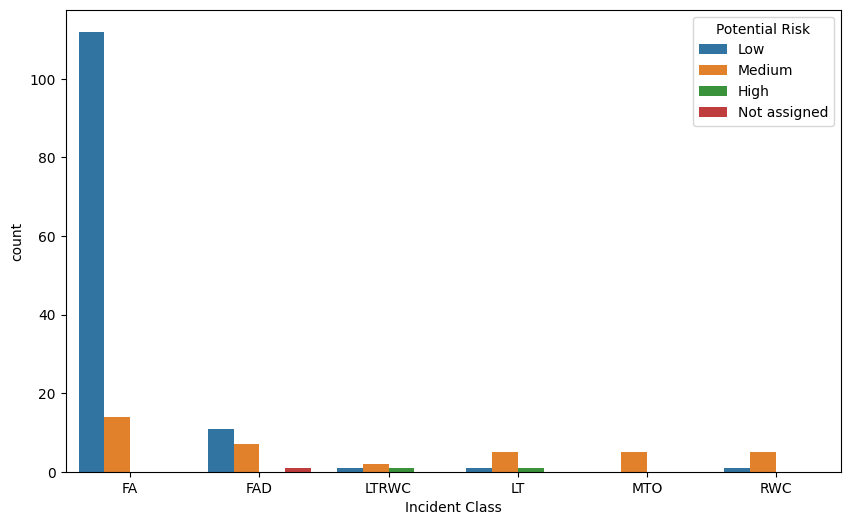

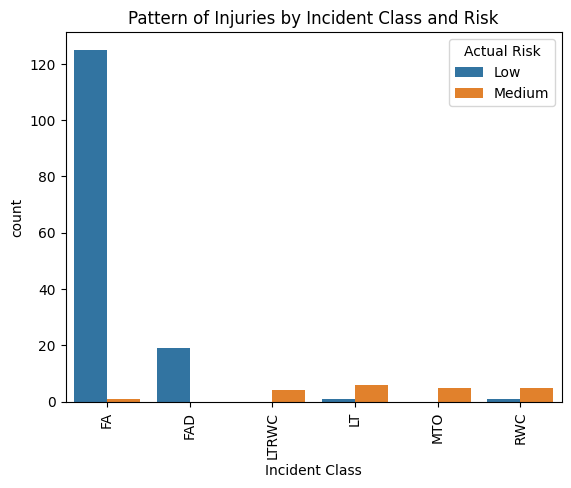

In [ ]:
# You can use data visualization to identify patterns. For example:
plt.figure(figsize=(10, 6))
sns.countplot(x='Incident Class', data=data, hue='Potential Risk')
plt.show()
sns.countplot(x='Incident Class', data=data, hue='Actual Risk')
plt.title('Pattern of Injuries by Incident Class and Risk')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['Company Name', 'Rig/Camp/Unit', 'Incident Number', 'Event Date',
       'Incident Calmonth', 'Customer', 'Injured Person Full Name', 'Position',
       'Actual Risk', 'Potential Risk', 'Target Type', 'Contact Type',
       'Body Part', 'Main Injury', 'Incident Class', 'Incident Description',
       'PD Experience Years', 'PD Experience Months', 'Location', 'Operation',
       'Derrick Hand', 'Driller', 'Floor Hand', 'Motor Hand', 'Incident Count',
       'Injured Count'],
      dtype='object')